In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{wasysym}')


import scipy.integrate as si
import scipy as sp
import scipy.optimize as so
import scipy.interpolate as st #sinterp

Abs=np.abs
Log=np.log
Log10=np.log10
Pi=np.pi
ArcTanh=np.arctanh
Sqrt=np.sqrt
Exp=np.exp
Cos=np.cos
Sin=np.sin
Arg=np.angle
BesselK=sp.special.kv
HeavisideTheta=lambda x: np.heaviside(x,0)
def Plot(fun,xminmax,n=100):
    xlist=np.linspace(xminmax[0],xminmax[1],n)
    ylist=[fun(x) for x in xlist]
    plt.plot(xlist,ylist)
    
import time
def Timing_begin():
    global time_start
    time_start=time.time()
def Timing_end():
    Δt=time.time()-time_start
    print("time used:",Δt)
    
    
    
def max_pos(L):
    if type(L)==np.ndarray:
        L=L.tolist()
    max_value = max(L)
    max_index = L.index(max_value)
    return max_value,max_index
    

In [2]:
# data

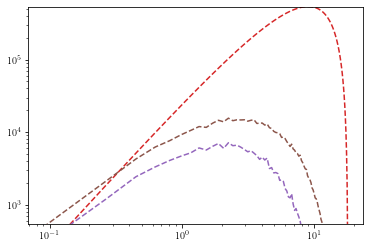

In [4]:

data=np.loadtxt("result/Contact_S.csv",delimiter=",",skiprows=1)
plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,2])
plt.plot(data[:,0],data[:,3])
# 
# plt.


data=np.loadtxt("plot-support/Single_νbar_Energy_Spectrum_Four-Fermion.csv",delimiter=",",skiprows=1)
plt.plot(data[:,0],data[:,1],ls="--")
plt.plot(data[:,0],data[:,2]*(10)**4,ls="--")

data=np.loadtxt("plot-support/Triple_νbar_Energy_Spectrum_Four-Fermion.csv",delimiter=",",skiprows=1)
plt.plot(data[:,0],data[:,2]*(10)**4,ls="--")
plt.loglog()
plt.ylim(max(data[:,1])/1e3,max(data[:,1]))
plt.show()

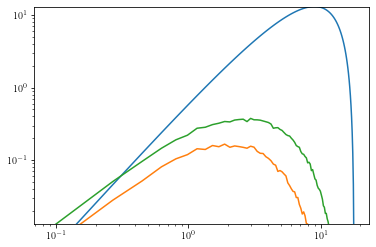

In [5]:
data=np.loadtxt("result/Contact_S.csv",delimiter=",",skiprows=1)
plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,2])
plt.plot(data[:,0],data[:,3])
plt.loglog()
plt.ylim(max(data[:,1])/1e3,max(data[:,1]))
plt.show()

In [6]:
# max_peak

mass= 12.6
mass= 12.6


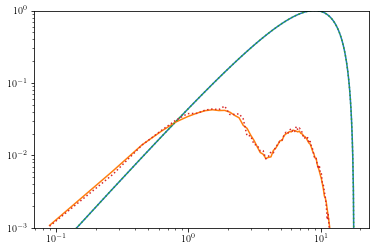

In [7]:

for i,filename in enumerate(["Energy_Spectrum.csv","Energy_Spectrum_phi.csv"]):
    data=np.loadtxt("plot-support/"+filename,delimiter=",",skiprows=1)
    line1=np.loadtxt("plot-support/"+filename,delimiter=",",max_rows=1,dtype=str)

    max_peak=max(data[:,1] )


    Eν_list=data[:,0]
    mϕ_list=[float(mstr) for mstr in line1[2:]]
    print("mass=",mϕ_list[-5])

    plt.plot(data[:,0],data[:,1]/max_peak,ls=["-",":"][i])
    plt.plot(data[:,0],data[:,-5]*1e4/max_peak,ls=["-",":"][i])
    # plt.plot(data[:,0],data[:,3])

dpeak_data=np.transpose([data[:,0],data[:,1],data[:,-5]])
dpeak_data2=np.transpose([data[:,0],data[:,-5]*1e4/max_peak])

plt.loglog()
plt.ylim(1e-3,1)
plt.show()

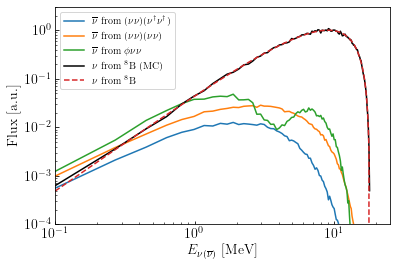

In [8]:
data=np.loadtxt("result/Contact_S.csv",delimiter=",",skiprows=1)
max_peak=max(data[:,1] )
B8y=data[:,1]/max_peak;
B8y[-1]=0
B8x=data[:,0]

Λ=10
plt.plot(data[:,0],data[:,2]/max_peak /Λ**4 *1e4,label=r"$\overline{\nu}$ from $(\nu\nu)(\nu^{\dagger}\nu^{\dagger})$")


plt.plot(data[:,0],data[:,3]/max_peak /Λ**4 *1e4,label=r"$\overline{\nu}$ from $(\nu\nu)(\nu\nu)$")




data=dpeak_data2
plt.plot(data[:,0],data[:,1],label=r"$\overline{\nu}$ from $\phi\nu\nu$") #+{\rm h.c.}





data=np.loadtxt("../public-code/result/B8_standard.csv",delimiter=",",skiprows=1)

plt.plot(data[:,0],data[:,2]/max_peak,label=r"$\nu$ from $^8$B (MC)",color="k")

plt.plot(B8x,B8y,label=r"$\nu$ from $^8$B",ls="--")


# plt.text(s=r"$\times 10^4$",x=8,y=1e-1,color="C2")
# plt.text(s=r"$\times 10^4$",x=8,y=1e-1,color="C2")
# plt.text(s=r"$\times 10^4$",x=8,y=1e-1,color="C2")

labelsize=14
plt.gca().tick_params(axis="both",direction="in",which="both",labelsize=labelsize)
plt.loglog()

plt.ylim(1e-4,3)
plt.xlim(1e-1,25)

plt.xlabel(r'$E_{\nu(\overline{\nu})}$  [MeV]',fontsize=labelsize)
plt.ylabel(r'Flux [a.u.]',fontsize=labelsize)


# ax.tick_params(axis="x",direction="in",which="both",labelsize=1.0*labelsize)
# ax.set_xscale('log')
# ax.set_yscale('log')

# plt.legend(loc="upper left",ncol=2)
# plt.legend(loc=[1.01,0.01])
plt.legend(loc="upper left")
# plt.savefig('../lyx/fig/spectrum.pdf',bbox_inches='tight')    
plt.show()

# solar P

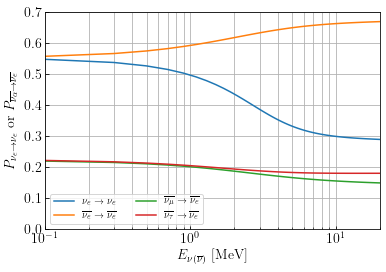

In [9]:
data=np.loadtxt("data/solarP_a_e.dat")
for i in [1,2,3,4]:
    plt.plot(data[:,0],data[:,i],
             label=[r"",r"$\nu_e\to\nu_e$",r"$\overline{\nu_e}\to \overline{\nu_e}$",
                    r"$\overline{\nu_\mu}\to \overline{\nu_e}$",r"$\overline{\nu_\tau}\to \overline{\nu_e}$"
                   ][i])

# # plt.text(s=r"$\times 10^4$",x=8,y=1e-1,color="C2")
# # plt.text(s=r"$\times 10^4$",x=8,y=1e-1,color="C2")
# # plt.text(s=r"$\times 10^4$",x=8,y=1e-1,color="C2")

labelsize=14
plt.gca().tick_params(axis="both",direction="in",which="both",labelsize=labelsize)
plt.xscale("log")

plt.ylim(0,0.7)
plt.xlim(1e-1,20)

plt.xlabel(r'$E_{\nu(\overline{\nu})}$  [MeV]',fontsize=labelsize)
plt.ylabel(r'$P_{\nu_{e}\to\nu_{e}}$ or $P_{\overline{\nu_{\alpha}}\to\overline{\nu_{e}}}$',fontsize=labelsize)

plt.grid(which='both')
plt.legend(loc="lower left",ncol=2)
# plt.savefig('../lyx/fig/P.pdf',bbox_inches='tight')    
plt.show()

# trash